## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

### Letícia Saraiva Chaves, 402120

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "recursos", como sexo e classe dos passageiros. Você também pode usar a engenharia de recursos para criar novos recursos.

O conjunto de teste deve ser usado para ver o desempenho do seu modelo em dados não vistos. Para o conjunto de testes, não fornecemos a verdade básica para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic.

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### Carregando os dados

In [4]:
train_data = pd.read_csv('train.csv')
teste_data = pd.read_csv('test.csv')

train, test= train_test_split(train_data, test_size=0.2, random_state=42)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [34]:
train.shape

(712, 12)

In [36]:
test.shape

(179, 12)

### Pré-processamento dos dados

In [37]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            140
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          553
Embarked         2
dtype: int64

In [38]:
teste_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Imprimindo o valor da moda do atributo 'Embarked' nos dados de treino.

In [68]:
train['Embarked'].mode().values[0]

'S'

Imprimindo o valor da moda do atributo 'Fare' nos dados de teste.

In [40]:
teste_data['Fare'].mode().values[0]

7.75

Atribuindo o valor da moda aos valores faltantes do atributo 'Embarked' nos dados de treino e também o valor da moda ao único valor faltante do atributo 'Fare' nos dados de teste. Excluindo colunas não importantes dos dados de treino e teste. E atribuindo a média das idades de ambos os dados (de treino e teste) aos valores faltantes do atributo 'Age'.

In [78]:
y_train = train['Survived'].values.reshape((train.shape[0], 1))
X_train = train.drop(columns=['PassengerId','Name', 'Cabin','Survived', 'Ticket'], axis=1)
X_train['Embarked'] = X_train['Embarked'].fillna('S')

X_test = test.drop(columns=['PassengerId','Name', 'Cabin', 'Ticket', 'Survived'], axis=1)
X_test['Fare'] = X_test['Fare'].fillna(7.75)
y_test = test['Survived'].values.reshape((test.shape[0], 1))

X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

In [79]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (712, 7)
X_test:  (179, 7)
y_train:  (712, 1)
y_test:  (179, 1)


Verificando se ainda há algum valor faltante nos dados de treino e teste.

In [80]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [81]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [82]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,0,1,0,0,1
733,2,23.0,0,0,13.0000,0,1,0,0,1
382,3,32.0,0,0,7.9250,0,1,0,0,1
704,3,26.0,1,0,7.8542,0,1,0,0,1
813,3,6.0,4,2,31.2750,1,0,0,0,1


In [83]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,30.505845,1,1,15.2458,0,1,1,0,0
439,2,31.000000,0,0,10.5000,0,1,0,0,1
840,3,20.000000,0,0,7.9250,0,1,0,0,1
720,2,6.000000,0,1,33.0000,1,0,0,0,1
39,3,14.000000,1,0,11.2417,1,0,1,0,0


### Escolhendo o melhor k

In [108]:
for k in range(1,30):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k, random_state=42)
    dt.fit(X_train,y_train)
    y_ = dt.predict(X_test)
    print('k =', k, ', accuracy =', accuracy_score(y_test, y_))

k = 1 , accuracy = 0.7821229050279329
k = 2 , accuracy = 0.7653631284916201
k = 3 , accuracy = 0.7988826815642458
k = 4 , accuracy = 0.7988826815642458
k = 5 , accuracy = 0.7988826815642458
k = 6 , accuracy = 0.7988826815642458
k = 7 , accuracy = 0.8100558659217877
k = 8 , accuracy = 0.7877094972067039
k = 9 , accuracy = 0.7988826815642458
k = 10 , accuracy = 0.7932960893854749
k = 11 , accuracy = 0.7597765363128491
k = 12 , accuracy = 0.7597765363128491
k = 13 , accuracy = 0.7541899441340782
k = 14 , accuracy = 0.7374301675977654
k = 15 , accuracy = 0.7318435754189944
k = 16 , accuracy = 0.7541899441340782
k = 17 , accuracy = 0.7374301675977654
k = 18 , accuracy = 0.7541899441340782
k = 19 , accuracy = 0.7541899441340782
k = 20 , accuracy = 0.7597765363128491
k = 21 , accuracy = 0.7541899441340782
k = 22 , accuracy = 0.7541899441340782
k = 23 , accuracy = 0.7541899441340782
k = 24 , accuracy = 0.7541899441340782
k = 25 , accuracy = 0.7541899441340782
k = 26 , accuracy = 0.754189944134

### Treinando o classificador

O k=7 teve a melhor acurácia, logo, podemos treinar os dados.

In [109]:
#K=7
dt = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

### Calculando a acurácia  

In [110]:
#K=7
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.8100558659217877

Mostrando a importância de cada feature.

In [111]:
#K=7
dt1.feature_importances_

array([0.16866976, 0.12279216, 0.03763784, 0.01027202, 0.16375417,
       0.47364106, 0.        , 0.01187463, 0.        , 0.01135837])

[Text(167.4, 181.2, 'X[5] <= 0.5\nentropy = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(83.7, 108.72, 'X[1] <= 6.5\nentropy = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(41.85, 36.23999999999998, '\n  (...)  \n'),
 Text(125.55000000000001, 36.23999999999998, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72, 'X[0] <= 2.5\nentropy = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(209.25, 36.23999999999998, '\n  (...)  \n'),
 Text(292.95, 36.23999999999998, '\n  (...)  \n')]

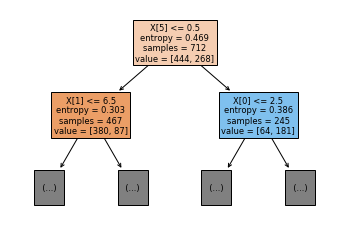

In [112]:
#K=7
tree.plot_tree(dt1, max_depth=1, filled=True)

[Text(152.96896551724137, 195.696, 'X[5] <= 0.5\nentropy = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(63.49655172413793, 152.208, 'X[1] <= 6.5\nentropy = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(23.089655172413792, 108.72, 'X[2] <= 2.5\nentropy = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(11.544827586206896, 65.232, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(34.63448275862069, 65.232, 'X[1] <= 2.5\nentropy = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(23.089655172413792, 21.744, '\n  (...)  \n'),
 Text(46.179310344827584, 21.744, '\n  (...)  \n'),
 Text(103.90344827586206, 108.72, 'X[0] <= 1.5\nentropy = 0.271\nsamples = 445\nvalue = [373, 72]'),
 Text(80.81379310344828, 65.232, 'X[4] <= 387.665\nentropy = 0.442\nsamples = 91\nvalue = [61, 30]'),
 Text(69.26896551724138, 21.744, '\n  (...)  \n'),
 Text(92.35862068965517, 21.744, '\n  (...)  \n'),
 Text(126.99310344827586, 65.232, 'X[4] <= 51.698\nentropy = 0.209\nsamples = 354\nvalue = [312, 42]'),
 Text(1

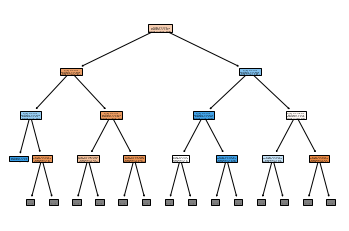

In [113]:
tree.plot_tree(dt, max_depth=3, filled=True)

Pegando as features com importância maior que 0.008.

In [114]:
df = pd.DataFrame(dt.feature_importances_)
df[ df[0] > 0.008]

,0
0,0.168670
1,0.122792
2,0.037638
3,0.010272
4,0.163754
5,0.473641
7,0.011875
9,0.011358


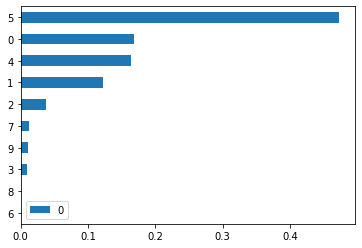

In [115]:
df.sort_values(by=0).plot(kind='barh');